#  Let's Grow More Internship

#  01 - BEGINNER LEVEL TASK

# Task -04 : Iris Flowers Classification ML Project

# Name : Prashant Kumar

In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from IPython.display import HTML
import warnings
%matplotlib inline

In [2]:
# Fetching the dataset
df=pd.read_csv(r'iris.csv')
df.head()

,Id,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Head of dataset
df.head()

,Id,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Shape of dataset
df.shape

(150, 6)

In [5]:
# 3 types of Species
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Label Encoding 

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

In [7]:
df.Species.unique()
#Iris-setosa = 0, Iris-versicolor = 1, Iris-virginica = 2

array([0, 1, 2])

In [8]:
report=sv.analyze(source=df)
report.show_html('Iris Report.html')

                                             |                                             | [  0%]   00:00 ->…

Report Iris Report was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Missing values

In [9]:
df.isnull().sum()

Id              0
Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Species         0
dtype: int64

#### Visualization EDA

C:\Users\KUMAR GAURAV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


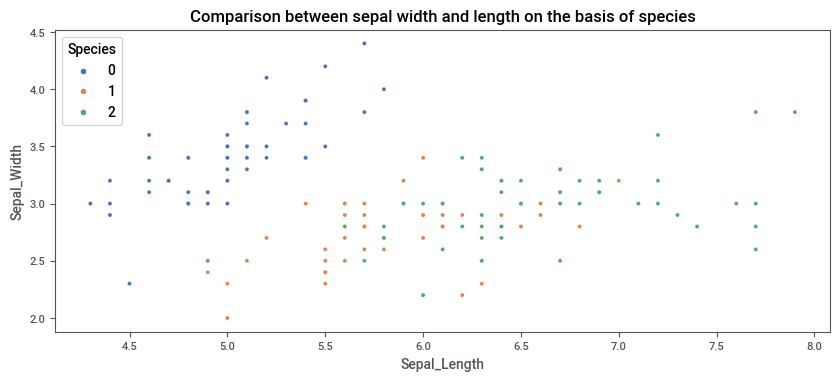

In [10]:
plt.figure(figsize=(10,4))
plt.title('Comparison between sepal width and length on the basis of species')
sns.scatterplot(df['Sepal_Length'],df['Sepal_Width'],hue=df['Species'],palette='deep')
plt.show()

C:\Users\KUMAR GAURAV\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


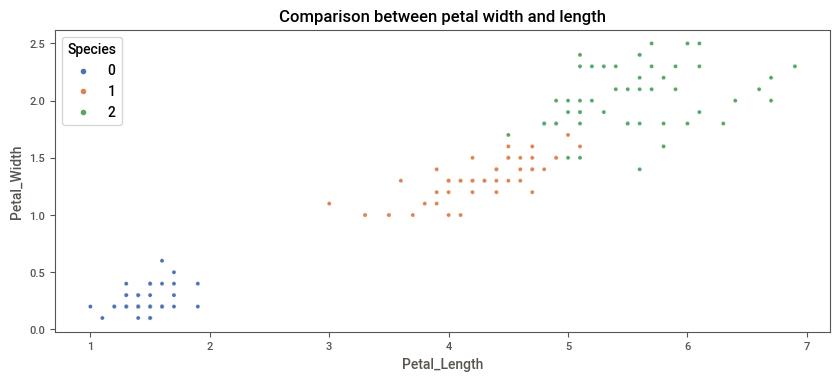

In [11]:
plt.figure(figsize=(10,4))
plt.title('Comparison between petal width and length')
sns.scatterplot(df['Petal_Length'], df['Petal_Width'],hue=df['Species'],palette='deep')
plt.show()

<AxesSubplot:>

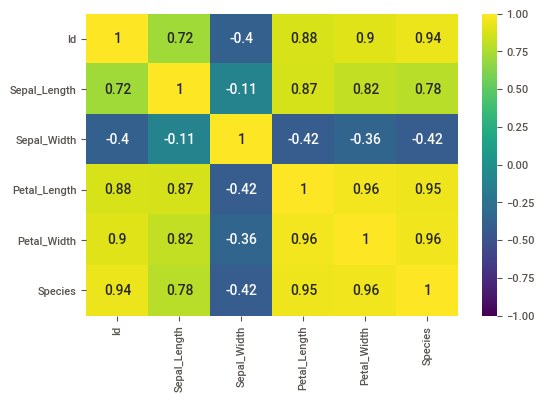

In [12]:
#correlation between features
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='viridis')

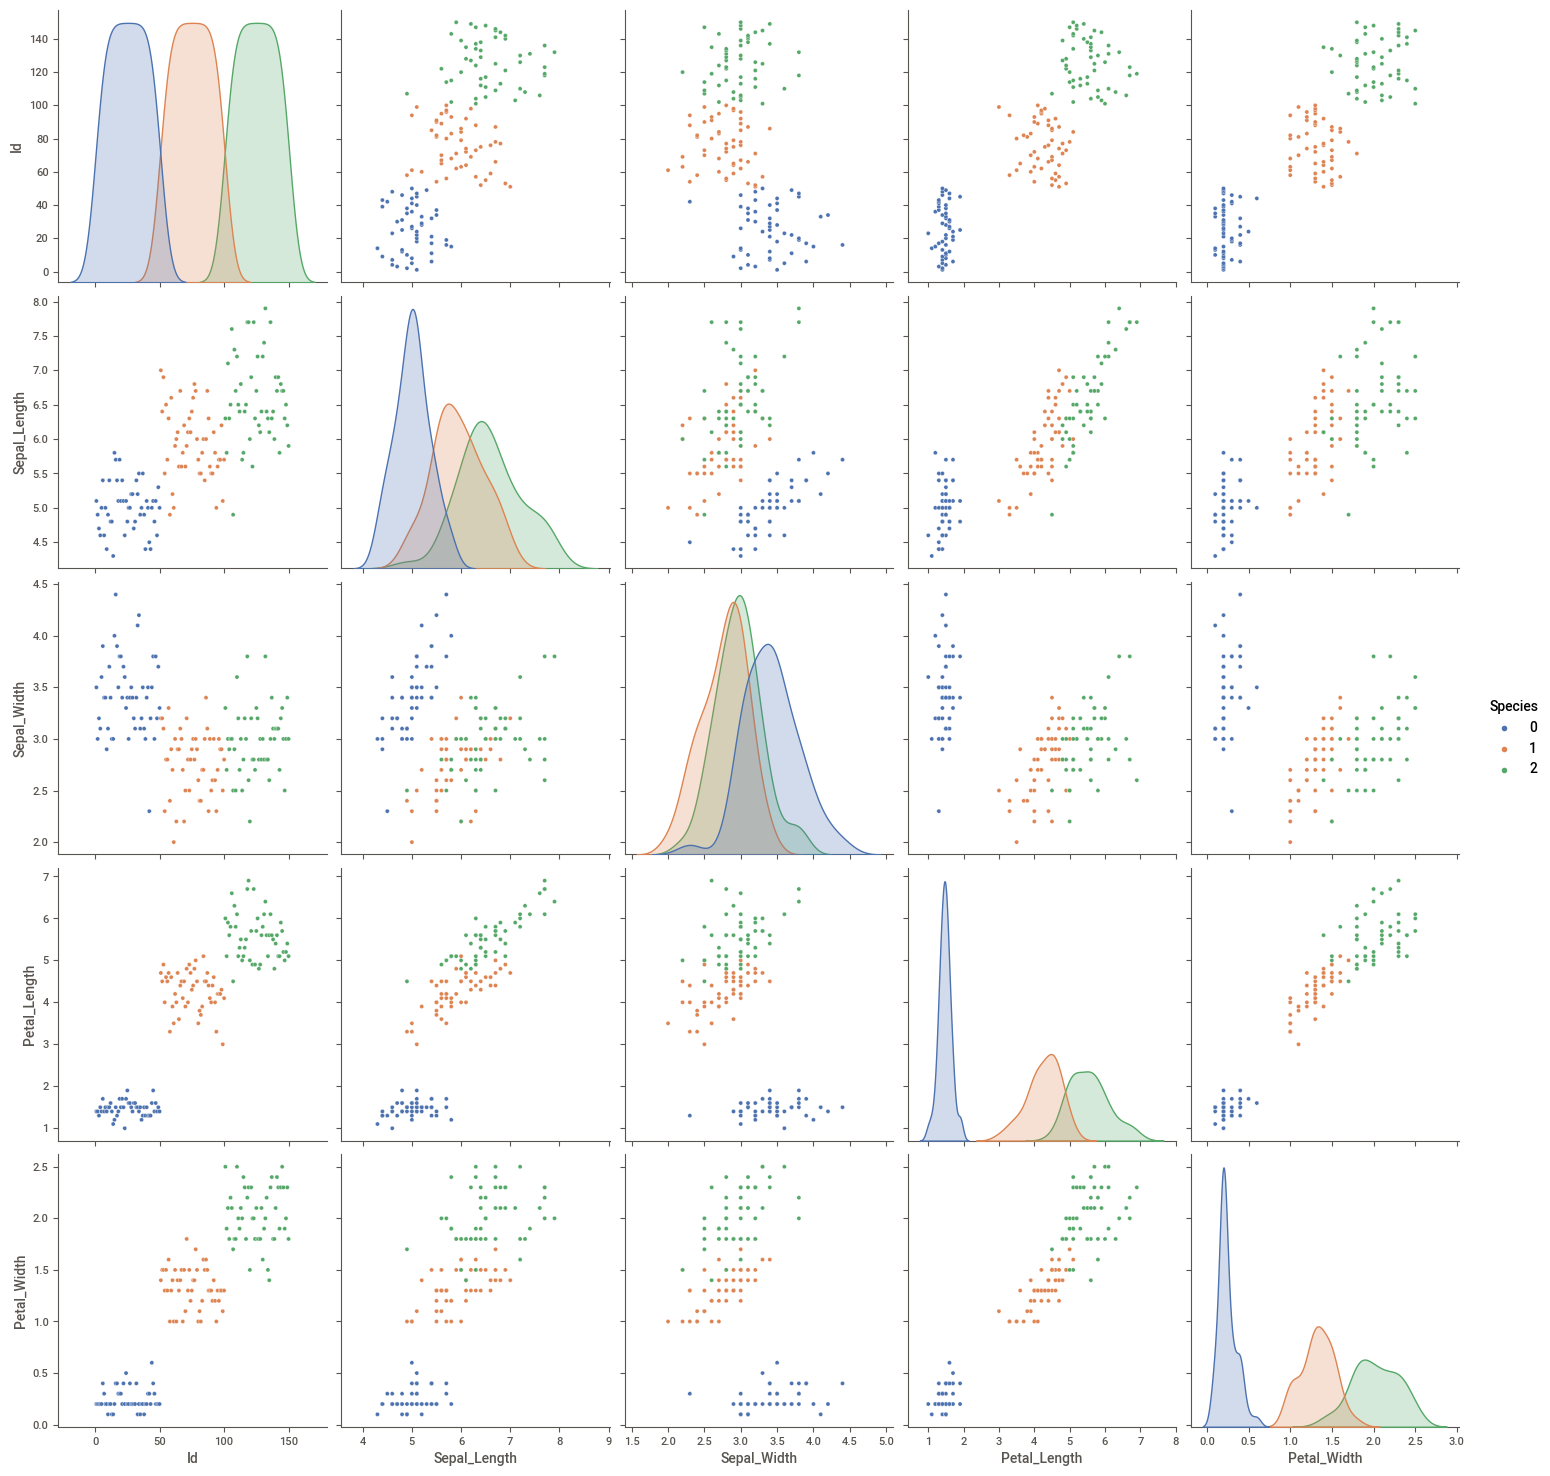

In [13]:
#Pairplot of Species
sns.pairplot(df,hue="Species",height=3,palette='deep')

In [14]:
#Seperate Dependent and Independent Features

#For Dependent feature we use 'y' variable
y=df['Species']

#For Indenpendent feature we use 'X' variable
x=df.drop(['Id','Species'],axis=1)

In [15]:
x.shape,y.shape

((150, 4), (150,))

In [16]:
#Spliting into training and testing dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test =  train_test_split(x,y,test_size=0.3,random_state=0)

In [17]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier()

In [18]:
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [19]:
# Feature Importance
classifier.feature_importances_

array([0.14942575, 0.03188411, 0.41564496, 0.40304518])

In [20]:
for feature, index in zip(x, range(4)):
    print(feature,':',classifier.feature_importances_[index])

Sepal_Length : 0.14942575416789022
Sepal_Width : 0.03188410685263287
Petal_Length : 0.41564496196130635
Petal_Width : 0.40304517701817066


In [21]:
y_pred=classifier.predict(x_test)

In [22]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [23]:
y_actual=np.array(y_test)
y_actual

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [24]:
print(np.round(classifier.score(x_test,y_test)*100,2),'%')

97.78 %


In [25]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_actual,y_pred)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

In [26]:
print(classification_report(y_actual,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



#### From here we found that our model predicts 97.87% of accuracy.

#### Thanks